In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

#Visualization Tools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# AI Workflow Module
from model_classifier import ModelClassifier, CustomClassifier

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Use for saving model 
import joblib

# Environment Parameters

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100 
plt.style.use('ggplot')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Data Preparation

In [2]:
train_df = pd.read_csv('../data/TCGA-SKCM_train_unresampled_v0.csv',index_col=0)
train_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTG1.1,ACTC1,ACTG1.2,ACTG1.3,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ANXA8L2.1,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,AMY2B.1,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOC1,APOC1P1,...,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,URAHP,HSFX2,SNAP47.2,SNAP47.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2.2,SPON2.3,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,RRN3P3,FAM66E,AC009501.4,NPIPB5.2,NPIPB5.3,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J.20,GAGE12J.21,GAGE12J.22,GAGE12J.23,GAGE12J.24,NBPF10,FCGR1B,KRTAP4-7,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5.2,PMS2P5.3,FAM66D,FAM182B.3,FAM182B.4,FAM182B.5,GOLGA8EP,GOLGA8EP.1,FAM95B1,FAM182B.6,FAM182B.7,FAM182B.8,UBE2Q2P2,UBE2Q2P2.1,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2.2,UBE2Q2P2.3,TEN1,POLR2J3.6,POLR2J3.7,POLR2J3.8,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,SCARNA9.2,SCARNA9.3,SRRM5,C19orf69,C17orf96,PRICKLE4.2,PRICKLE4.3,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2.2,CTD-2547E10.2.3,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P.6,WASH2P.7,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1,ajcc_pathologic_stage_Stage 0,ajcc_pathologic_stage_Stage I,ajcc_pathologic_stage_Stage IA,ajcc_pathologic_stage_Stage IB,ajcc_pathologic_stage_Stage II,ajcc_pathologic_stage_Stage IIA,ajcc_pathologic_stage_Stage IIB,ajcc_pathologic_stage_Stage IIC,ajcc_pathologic_stage_Stage III,ajcc_pathologic_stage_Stage IIIA,ajcc_pathologic_stage_Stage IIIB,ajcc_pathologic_stage_Stage IIIC,ajcc_pathologic_stage_Stage IV,tumor_stage_stage 0,tumor_stage_stage i,tumor_stage_stage ia,tumor_stage_stage ib,tumor_stage_stage ii,tumor_stage_stage iia,tumor_stage_stage iib,tumor_stage_stage iic,tumor_stage_stage iii,tumor_stage_stage iiia,tumor_stage_stage iiib,tumor_stage_stage iiic,tumor_stage_stage iv,ajcc_pathologic_t_T1,ajcc_pathologic_t_T1a,ajcc_pathologic_t_T1b,ajcc_pathologic_t_T2,ajcc_pathologic_t_T2a,ajcc_pathologic_t_T2b,ajcc_pathologic_t_T3,ajcc_pathologic_t_T3a,ajcc_pathologic_t_T3b,ajcc_pathologic_t_T4,ajcc_pathologic_t_T4a,ajcc_pathologic_t_T4b,ajcc_pathologic_t_TX,ajcc_pathologic_t_Tis,ajcc_pathologic_n_N1,ajcc_pathologic_n_N1a,ajcc_pathologic_n_N1b,ajcc_pathologic_n_N2,ajcc_pathologic_n_N

In [3]:
test_df = pd.read_csv('../data/TCGA-SKCM_test_unresampled_v0.csv',index_col=0)
test_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTG1.1,ACTC1,ACTG1.2,ACTG1.3,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ANXA8L2.1,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,AMY2B.1,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOC1,APOC1P1,...,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,URAHP,HSFX2,SNAP47.2,SNAP47.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2.2,SPON2.3,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,RRN3P3,FAM66E,AC009501.4,NPIPB5.2,NPIPB5.3,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J.20,GAGE12J.21,GAGE12J.22,GAGE12J.23,GAGE12J.24,NBPF10,FCGR1B,KRTAP4-7,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5.2,PMS2P5.3,FAM66D,FAM182B.3,FAM182B.4,FAM182B.5,GOLGA8EP,GOLGA8EP.1,FAM95B1,FAM182B.6,FAM182B.7,FAM182B.8,UBE2Q2P2,UBE2Q2P2.1,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2.2,UBE2Q2P2.3,TEN1,POLR2J3.6,POLR2J3.7,POLR2J3.8,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,SCARNA9.2,SCARNA9.3,SRRM5,C19orf69,C17orf96,PRICKLE4.2,PRICKLE4.3,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2.2,CTD-2547E10.2.3,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P.6,WASH2P.7,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1,ajcc_pathologic_stage_Stage 0,ajcc_pathologic_stage_Stage I,ajcc_pathologic_stage_Stage IA,ajcc_pathologic_stage_Stage IB,ajcc_pathologic_stage_Stage II,ajcc_pathologic_stage_Stage IIA,ajcc_pathologic_stage_Stage IIB,ajcc_pathologic_stage_Stage IIC,ajcc_pathologic_stage_Stage III,ajcc_pathologic_stage_Stage IIIA,ajcc_pathologic_stage_Stage IIIB,ajcc_pathologic_stage_Stage IIIC,ajcc_pathologic_stage_Stage IV,tumor_stage_stage 0,tumor_stage_stage i,tumor_stage_stage ia,tumor_stage_stage ib,tumor_stage_stage ii,tumor_stage_stage iia,tumor_stage_stage iib,tumor_stage_stage iic,tumor_stage_stage iii,tumor_stage_stage iiia,tumor_stage_stage iiib,tumor_stage_stage iiic,tumor_stage_stage iv,ajcc_pathologic_t_T1,ajcc_pathologic_t_T1a,ajcc_pathologic_t_T1b,ajcc_pathologic_t_T2,ajcc_pathologic_t_T2a,ajcc_pathologic_t_T2b,ajcc_pathologic_t_T3,ajcc_pathologic_t_T3a,ajcc_pathologic_t_T3b,ajcc_pathologic_t_T4,ajcc_pathologic_t_T4a,ajcc_pathologic_t_T4b,ajcc_pathologic_t_TX,ajcc_pathologic_t_Tis,ajcc_pathologic_n_N1,ajcc_pathologic_n_N1a,ajcc_pathologic_n_N1b,ajcc_pathologic_n_N2,ajcc_pathologic_n_N

### Feature Selection

In [4]:
features = [
       'gender_male', 'ethnicity_not hispanic or latino',
       'ethnicity_not reported',
       'treatments_pharmaceutical_treatment_or_therapy_not reported',
       'treatments_pharmaceutical_treatment_or_therapy_yes',
       'treatments_radiation_treatment_or_therapy_not reported',
       'treatments_radiation_treatment_or_therapy_yes',
       'age_at_index',
       'bmi',
       'C7', 'KRT17', 'CLEC2A', 'S100A7A', 'KRTDAP', 'WFDC5', 'KRT6B',
       'S100A7', 'KRT14', 'PVRL4'
]

model_classifier = ModelClassifier(
    train = train_df, 
    validation = test_df, 
    label = 'sample_type', 
    label_values = ['Primary Tumor', 'Metastatic'],
    features = features, 
    label_binarizer = False)

## Model Development

In [5]:
# Logistic Regression

lr_pipeline_params = [
    {
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    }
]

# Support Vector Machines - Linear Kernel

svm_linear_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    }
]

# Support Vector Machines - Polynomial Kernel

svm_poly_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': ['scale', 0.1, 0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Support Vector Machines - Radial Basis Kernel


svm_rbf_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Support Vector Machines - Sigmoid Kernel


svm_sigmoid_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Naive Bayes

gnb_pipeline_params = [
    {   
        'clf__estimator': [GaussianNB(priors = None)], 
    },
]

# Random Forest

rf_pipeline_params = [
    {   
        'clf__estimator': [RandomForestClassifier(random_state = 1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]  
    },
]

# All Models in one pipeline without PCA

pipeline_params = [
    {
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': ['scale', 0.1, 0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [RandomForestClassifier(random_state = 1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]   
    },
    {
        'clf__estimator': [GaussianNB(priors = None)]
    }

]

# All Models in one pipeline with PCA


pca_pipeline_params = [
    {
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],        
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': [10.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': [0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    { 
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    { 
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [RandomForestClassifier(random_state=1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]   
    },
    {
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [GaussianNB(priors = None)]
    }

]

### Model Performance [Without PCA]

#### Logistic Regression

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameter (CV score=0.886):
{'clf__estimator': LogisticRegression(C=100, max_iter=10000, penalty='l1', solver='liblinear'), 'clf__estimator__C': 100, 'clf__estimator__penalty': 'l1'}

Training Performance:
AUC score: 0.9280221262817053
LogLoss score: 0.27299750980060167
Accuracy: 0.8951048951048951
f1 macro: 0.8311688311688312
f1 micro: 0.8951048951048951
f1 weighted: 0.885659794750704
Precision macro: 0.8841173865989628
Precision micro: 0.8841173865989628
Precision weighted: 0.8841173865989628
Recall macro: 0.7895304910955208
Recall micro: 0.8951048951048951
Recall weighted: 0.8951048951048951

Validation Performance:
AUC score: 0.9115920763022745
LogLoss score: 0.3026248719575464
Accuracy: 0.9024390243902439
f1 macro: 0.8493877551020408
f1 micro: 0.9024390243902439
f1 weighted: 0.8966251866600298
Precision macro: 0.8990302919299531
Precision micro: 0.8990302919299531
Precision weighted: 0.8990302919299531
Recall macro:

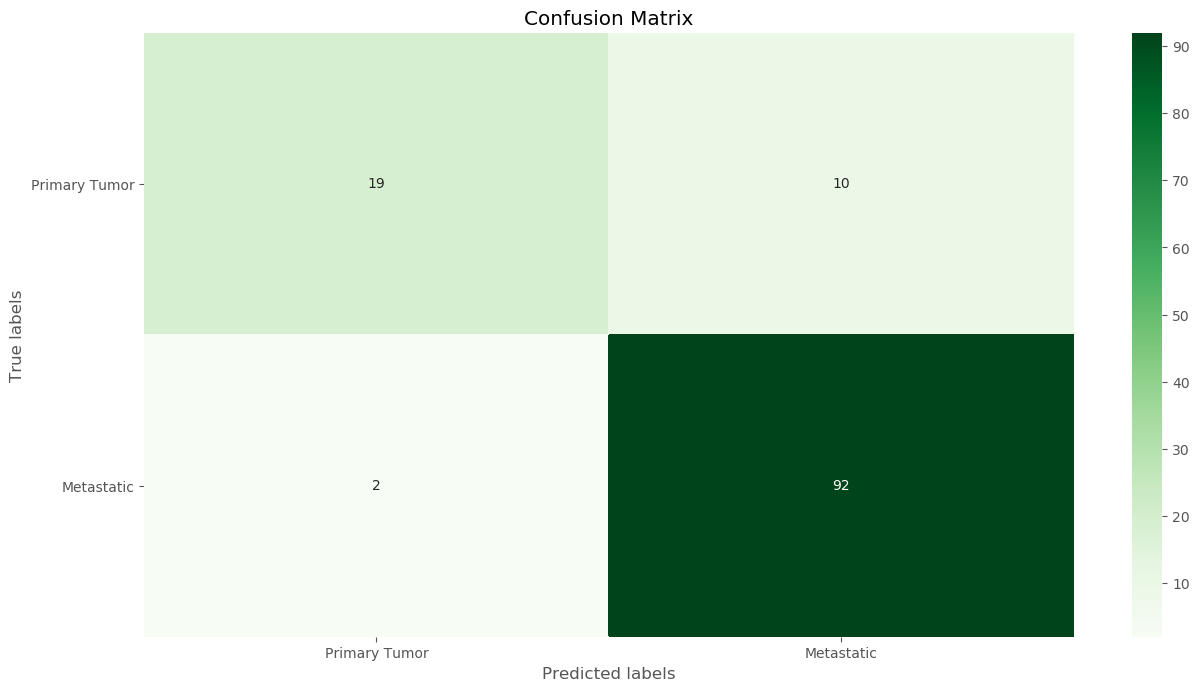

In [6]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

lr_model = model_classifier.classifier(lr_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(lr_model, confusion_matrix = True)

#### Support Vector Machines - Linear Kernel

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.888):
{'clf__estimator': SVC(decision_function_shape='ovo', kernel='linear', probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 'scale'}

Training Performance:
AUC score: 0.845250944414463
LogLoss score: 0.4524926224386164
Accuracy: 0.8426573426573427
f1 macro: 0.7110916560037713
f1 micro: 0.8426573426573427
f1 weighted: 0.8133447803459253
Precision macro: 0.8311002857032594
Precision micro: 0.8311002857032594
Precision weighted: 0.8311002857032594
Recall macro: 0.6741770102536427
Recall micro: 0.8426573426573427
Recall weighted: 0.8426573426573427

Validation Performance:
AUC score: 0.9273661041819515
LogLoss score: 0.4195766574572243
Accuracy: 0.8455284552845529
f1 macro: 0.7322717378852102
f1 micro: 0.845528455284553
f1 weighted: 0.8242928207721761
Precision macro: 0.8423386322483174
Precision micro: 0.8423386322483174
Precision weighted: 0.8423386322483

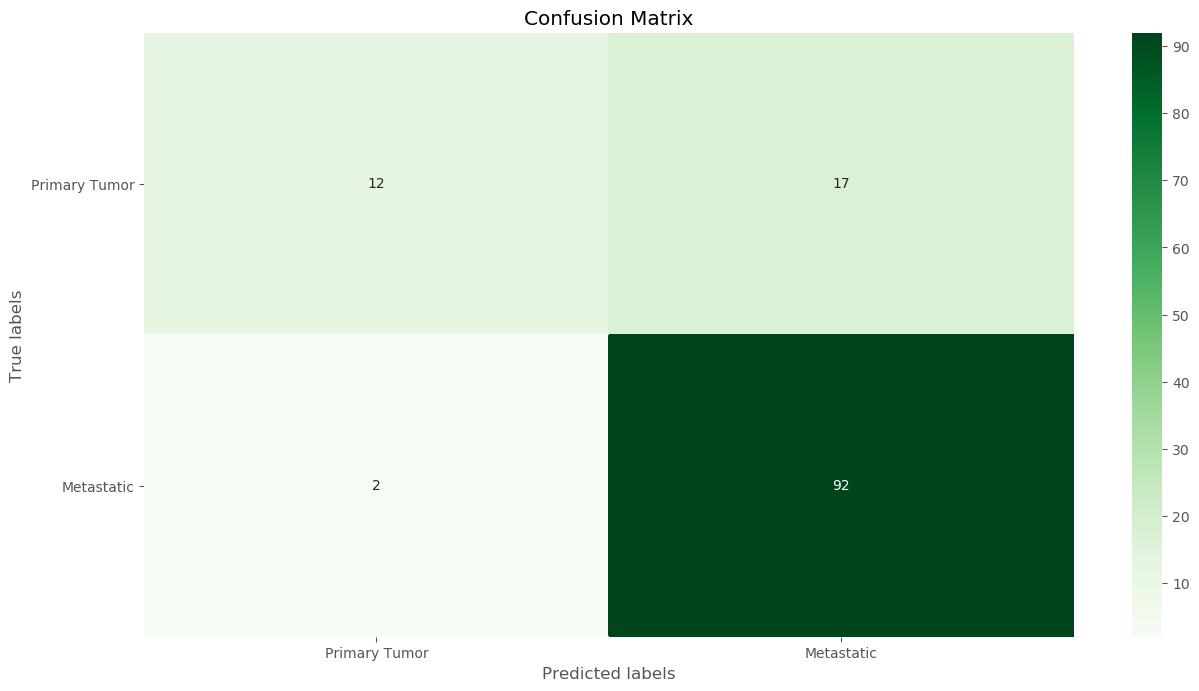

In [7]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

svm_lin_model = model_classifier.classifier(svm_linear_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(svm_lin_model, confusion_matrix = True)

#### Support Vector Machines - Polynomial Kernel

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.879):
{'clf__estimator': SVC(decision_function_shape='ovo', gamma=0.01, kernel='poly', probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 0.01}

Training Performance:
AUC score: 0.8956422018348624
LogLoss score: 0.49483793084061445
Accuracy: 0.7937062937062938
f1 macro: 0.5572871572871573
f1 micro: 0.7937062937062938
f1 weighted: 0.7269659633295996
Precision macro: 0.7870036101083032
Precision micro: 0.7870036101083032
Precision weighted: 0.7870036101083032
Recall macro: 0.5661764705882353
Recall micro: 0.7937062937062938
Recall weighted: 0.7937062937062938

Validation Performance:
AUC score: 0.8297872340425533
LogLoss score: 0.5386210255061752
Accuracy: 0.7723577235772358
f1 macro: 0.4970794392523365
f1 micro: 0.7723577235772358
f1 weighted: 0.6937067851986932
Precision macro: 0.7748854004497492
Precision micro: 0.7748854004497492
Precision weighted: 0.774

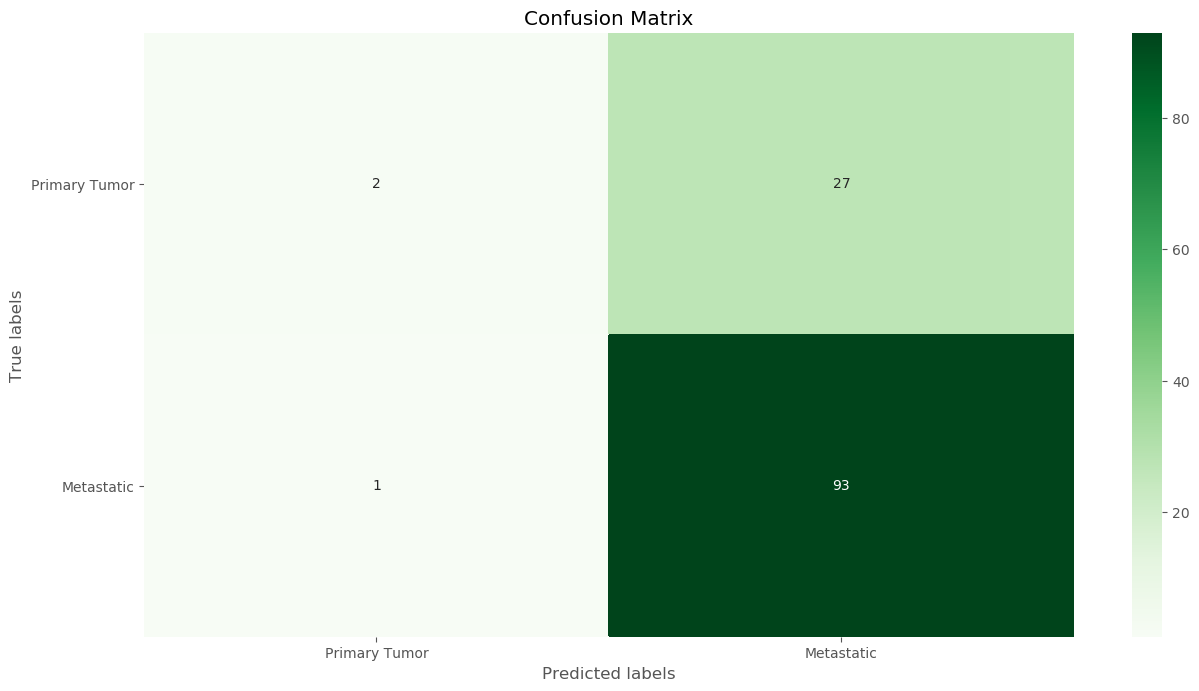

In [8]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

svm_poly_model = model_classifier.classifier(svm_poly_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(svm_poly_model, confusion_matrix = True)

#### Support Vector Machines - Radial Basis Kernel

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.883):
{'clf__estimator': SVC(decision_function_shape='ovo', probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 'scale'}

Training Performance:
AUC score: 0.9333513221802483
LogLoss score: 0.34308270192553125
Accuracy: 0.8321678321678322
f1 macro: 0.6835408022130014
f1 micro: 0.8321678321678322
f1 weighted: 0.7972859781988412
Precision macro: 0.8216956972690918
Precision micro: 0.8216956972690918
Precision weighted: 0.8216956972690918
Recall macro: 0.6521181867242309
Recall micro: 0.8321678321678322
Recall weighted: 0.8321678321678322

Validation Performance:
AUC score: 0.929567131327953
LogLoss score: 0.38189844059883943
Accuracy: 0.8373983739837398
f1 macro: 0.7128851540616247
f1 micro: 0.8373983739837398
f1 weighted: 0.8128031700485072
Precision macro: 0.834828827978802
Precision micro: 0.834828827978802
Precision weighted: 0.834828827978802
Recall macro:

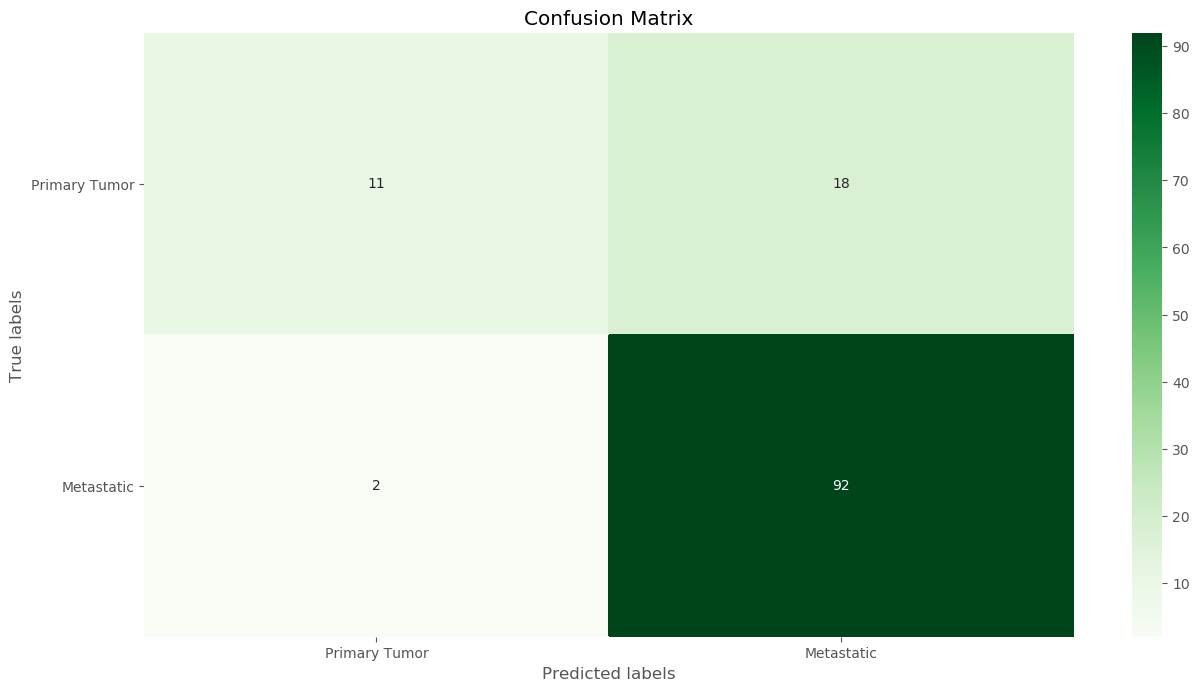

In [9]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

svm_rbf_model = model_classifier.classifier(svm_rbf_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(svm_rbf_model, confusion_matrix = True)

#### Support Vector Machines - Sigmoid Kernel

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.885):
{'clf__estimator': SVC(decision_function_shape='ovo', gamma=0.01, kernel='sigmoid',
    probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 0.01}

Training Performance:
AUC score: 0.8264301133297356
LogLoss score: 0.42444010638590046
Accuracy: 0.8006993006993007
f1 macro: 0.5814311757003107
f1 micro: 0.8006993006993007
f1 weighted: 0.7403211213517528
Precision macro: 0.7927272727272727
Precision micro: 0.7927272727272727
Precision weighted: 0.7927272727272727
Recall macro: 0.5808823529411765
Recall micro: 0.8006993006993007
Recall weighted: 0.8006993006993007

Validation Performance:
AUC score: 0.925531914893617
LogLoss score: 0.44091700970944037
Accuracy: 0.8130081300813008
f1 macro: 0.6341652657442132
f1 micro: 0.8130081300813008
f1 weighted: 0.769337198092012
Precision macro: 0.8082225882388333
Precision micro: 0.8082225882388333
Precision weighted:

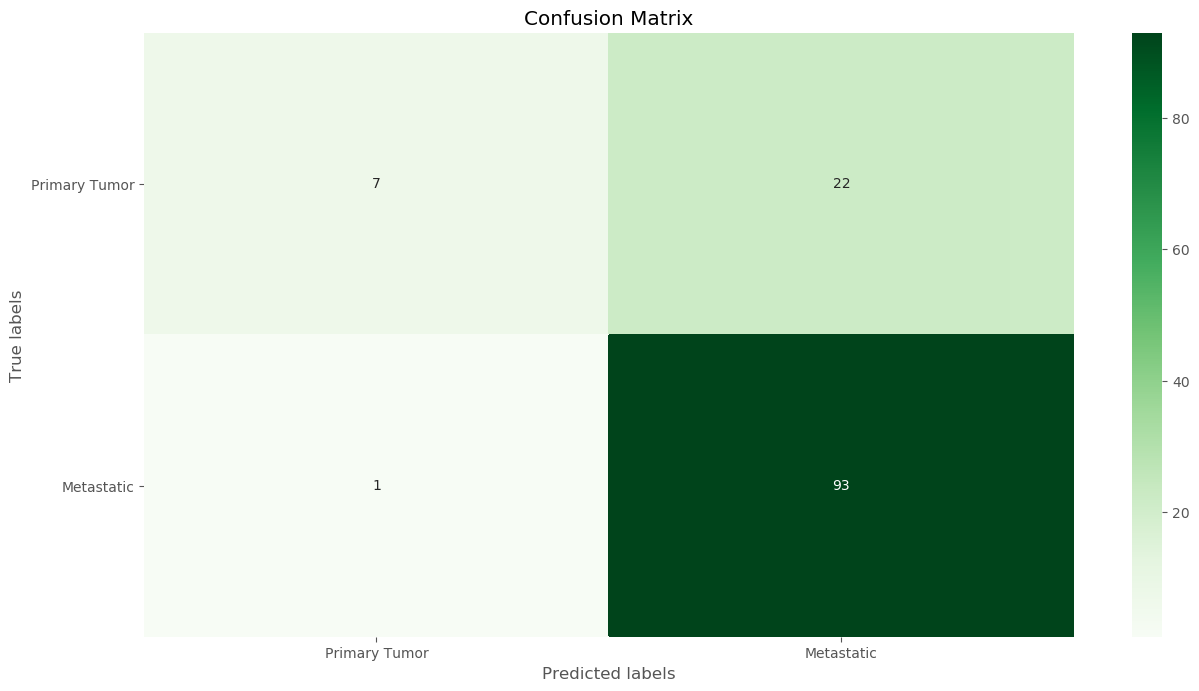

In [10]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

svm_sig_model = model_classifier.classifier(svm_sigmoid_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(svm_sig_model, confusion_matrix = True)

#### Naive Bayes

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best parameter (CV score=0.895):
{'clf__estimator': GaussianNB()}

Training Performance:
AUC score: 0.7079060982191042
LogLoss score: 5.582212774094533
Accuracy: 0.8321678321678322
f1 macro: 0.6995798319327731
f1 micro: 0.8321678321678322
f1 weighted: 0.8042545689604513
Precision macro: 0.8282239771465288
Precision micro: 0.8282239771465288
Precision weighted: 0.8282239771465288
Recall macro: 0.6672962763086886
Recall micro: 0.8321678321678322
Recall weighted: 0.8321678321678322

Validation Performance:
AUC score: 0.8277696258253852
LogLoss score: 4.470527273640895
Accuracy: 0.8617886178861789
f1 macro: 0.7688225538971807
f1 micro: 0.861788617886179
f1 weighted: 0.8462942738880125
Precision macro: 0.857779351307134
Precision micro: 0.857779351307134
Precision weighted: 0.857779351307134
Recall macro: 0.7307410124724871
Recall micro: 0.8617886178861789
Recall weighted: 0.8617886178861789


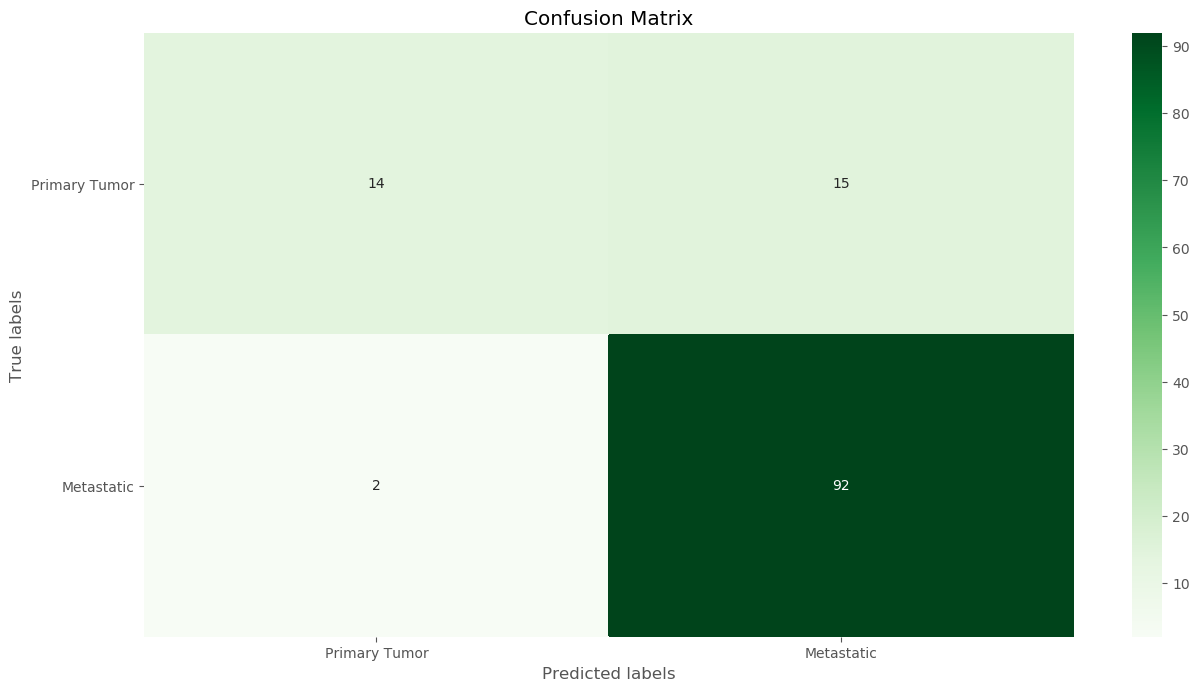

In [11]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

nb_model = model_classifier.classifier(gnb_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(nb_model, confusion_matrix = True)

#### Random Forest

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
Best parameter (CV score=0.914):
{'clf__estimator': RandomForestClassifier(max_features=0.6, min_samples_leaf=12, n_estimators=80,
                       random_state=1), 'clf__estimator__max_features': 0.6, 'clf__estimator__min_samples_leaf': 12, 'clf__estimator__min_samples_split': 2, 'clf__estimator__n_estimators': 80}

Training Performance:
AUC score: 0.9693065299514302
LogLoss score: 0.21712262049565964
Accuracy: 0.9090909090909091
f1 macro: 0.8676774147626166
f1 micro: 0.9090909090909091
f1 weighted: 0.906502565695391
Precision macro: 0.9152245629792709
Precision micro: 0.9152245629792709
Precision weighted: 0.9152245629792709
Recall macro: 0.8492984349703184
Recall micro: 0.9090909090909091
Recall weighted: 0.9090909090909091

Validation Performance:
AUC score: 0.9812912692589875
LogLoss score: 0.19464848748937058
Accuracy: 0.9349593495934959
f1 macro: 0.9097578870139399
f1 micro: 0.9349593495934959
f1 weighted: 0.9

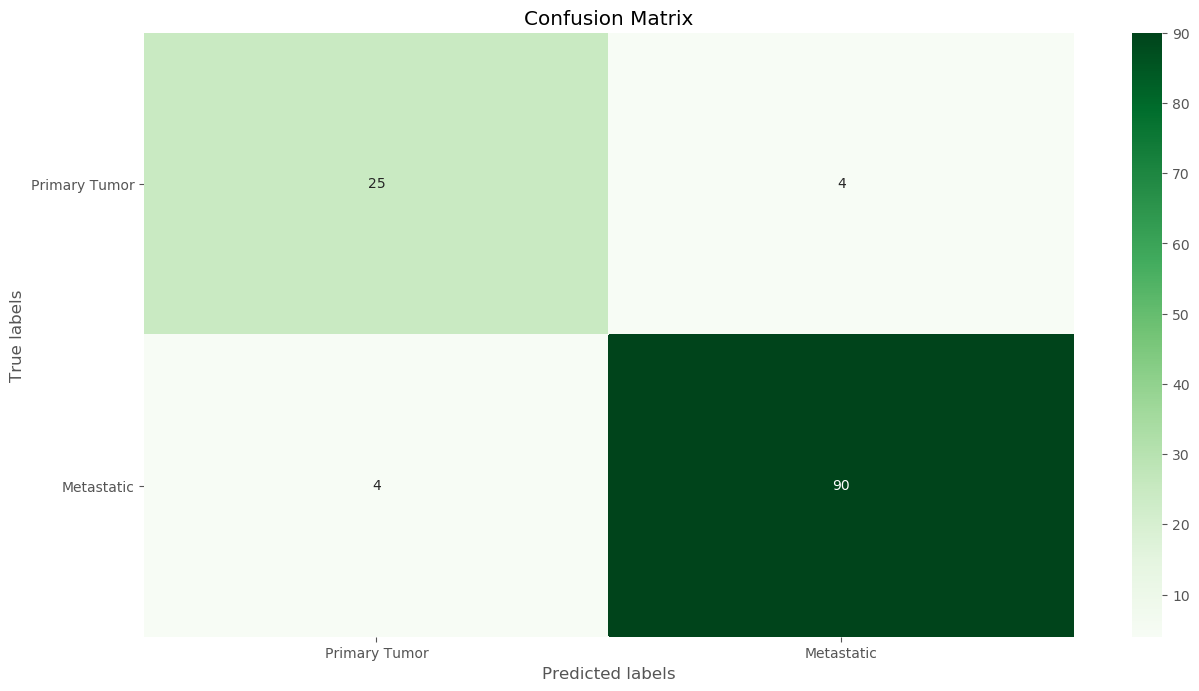

In [12]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

rf_model = model_classifier.classifier(rf_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(rf_model, confusion_matrix = True)

#### All Models in one pipeline without PCA

Fitting 2 folds for each of 569 candidates, totalling 1138 fits
Best parameter (CV score=0.914):
{'clf__estimator': RandomForestClassifier(max_features=0.6, min_samples_leaf=12, n_estimators=80,
                       random_state=1), 'clf__estimator__max_features': 0.6, 'clf__estimator__min_samples_leaf': 12, 'clf__estimator__min_samples_split': 2, 'clf__estimator__n_estimators': 80}

Training Performance:
AUC score: 0.9693065299514302
LogLoss score: 0.21712262049565964
Accuracy: 0.9090909090909091
f1 macro: 0.8676774147626166
f1 micro: 0.9090909090909091
f1 weighted: 0.906502565695391
Precision macro: 0.9152245629792709
Precision micro: 0.9152245629792709
Precision weighted: 0.9152245629792709
Recall macro: 0.8492984349703184
Recall micro: 0.9090909090909091
Recall weighted: 0.9090909090909091

Validation Performance:
AUC score: 0.9812912692589875
LogLoss score: 0.19464848748937058
Accuracy: 0.9349593495934959
f1 macro: 0.9097578870139399
f1 micro: 0.9349593495934959
f1 weighted: 0.9

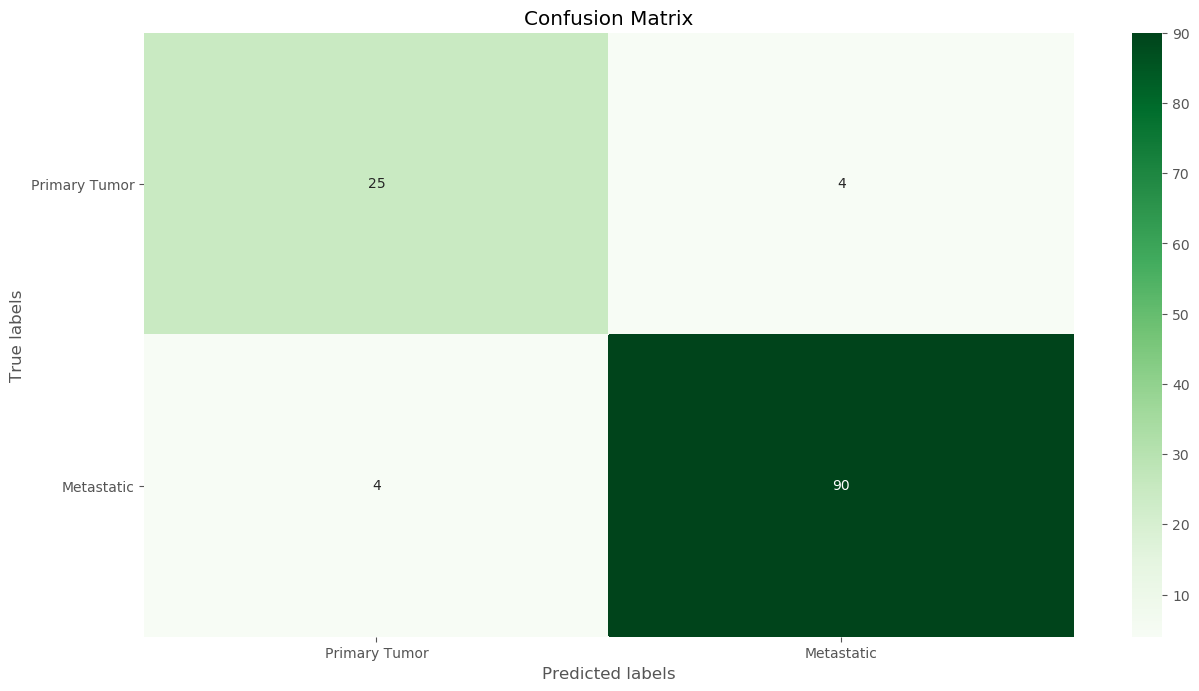

In [13]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

### Model Performance [With PCA]

In [15]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model_pca = model_classifier.classifier(pca_pipeline_params, grid_search_parameters, pca = True)

model_classifier.classifier_metrics(model_pca, confusion_matrix = True)

### Saving plots of Random Forest Estimators

In [16]:
from subprocess import check_call
from sklearn.tree import export_graphviz

# Get the final model
final_model = model[1].estimator

for index in range(0, final_model.n_estimators):
    export_graphviz(final_model.estimators_[index],
                     out_file="../data/rf_plot/rf_{}.dot".format(index),
                     feature_names = model_classifier.train_features.columns, 
                     class_names = model_classifier.label_values,
                     filled = True)


for index in range(0, final_model.n_estimators):
    check_call(['dot','-Tpng',"../data/rf_plot/rf_{}.dot".format(index),'-o',"../data/rf_plot/rf_{}.png".format(index)])


### Getting weights of each Features

In [17]:
rf_weights = pd.DataFrame(final_model.feature_importances_)
rf_weights.index = model_classifier.train_features.columns
rf_weights.columns = ["weights"]
rf_weights.sort_values(by=['weights'], inplace=True, ascending=False)
rf_weights.to_csv('../data/Melanoma_Top10_Clinical_RF_weights.csv')
rf_weights

,weights
C7,0.353112
CLEC2A,0.244842
KRT17,0.129425
S100A7A,0.087982
KRT6B,0.057937
S100A7,0.044100
WFDC5,0.025667
KRTDAP,0.014850
PVRL4,0.013643
age_at_index,0.009542


### Save the model for deployment

In [18]:
joblib.dump(model, 'melanoma_combined_classifier.pkl', compress=9)

['melanoma_combined_classifier.pkl']

In [19]:
# Retrieve model
melanoma_classifier_model = joblib.load('melanoma_combined_classifier.pkl')

In [20]:
joblib.dump(lr_model, 'melanoma_combined_lr_model_classifier.pkl', compress=9)
joblib.dump(svm_lin_model, 'melanoma_combined_svm_lin_model_classifier.pkl', compress=9)
joblib.dump(svm_poly_model, 'melanoma_combined_svm_poly_model_classifier.pkl', compress=9)
joblib.dump(svm_rbf_model, 'melanoma_combined_svm_rbf_model_classifier.pkl', compress=9)
joblib.dump(svm_sig_model, 'melanoma_combined_svm_sig_model_classifier.pkl', compress=9)
joblib.dump(nb_model, 'melanoma_combined_nb_model_classifier.pkl', compress=9)
joblib.dump(rf_model, 'melanoma_combined_rf_model_classifier.pkl', compress=9)

['melanoma_combined_rf_model_classifier.pkl']